<a href="https://www.kaggle.com/code/mohd647/zomato-bangalore-data-eda?scriptVersionId=135920725" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Bengaluru has a diverse food culture with restaurants offering a range of cuisines from around the world. There are approximately 12,000 restaurants in the city, and new ones are opening every day. 
However, new restaurants face challenges such as 
1. high real estate costs, 
1. rising food costs, 
1. and shortage of quality manpower. 

Zomato data can help new restaurants in deciding their **theme, menus, cuisine, cost, and finding similarities between neighborhoods based on food.** 
The dataset also contains reviews for each restaurant which can help in finding overall ratings.

This analysis can also help people in finding best restaurants in the city.

Step 1: 
* Data Cleaning:

1. Delete unnecessary columns.
1. Rename the columns.
1. Drop duplicate rows.
1. Clean individual columns.
1. Replace NaN values from the dataset with mean of the columns.
1. Perform additional transformations.

Step 2:

* Data visualization

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
random.seed(42)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
5
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
%autosave 1
%matplotlib inline

Autosaving every 1 seconds


In [3]:
data = pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")

# Take an overview of data

In [4]:
data.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
47245,https://www.zomato.com/bangalore/monsoon-the-p...,"The Park Bangalore, 14/7, MG Road, Bangalore",Monsoon - The Park Bangalore,No,Yes,4.1 /5,274,+91 9035808038\n+91 9049882302,MG Road,Fine Dining,"Salads, Brownie, Cheesecake, Salad, Biryani, D...","Italian, North Indian","3,000","[('Rated 1.0', 'RATED\n Food - 2/5\n\nAmbienc...",[],Buffet,Residency Road
49769,https://www.zomato.com/bangalore/home-tiff-inn...,"8/ 601-602/ 22-5, Kasavanahalli Main Road, Sar...",Home Tiff-INN's,No,No,3.6 /5,18,+91 6362446676,Sarjapur Road,Quick Bites,NaN,"South Indian, Chettinad",250,"[('Rated 4.0', 'RATED\n Got food delivered - ...",[],Dine-out,Sarjapur Road
1651,https://www.zomato.com/bangalore/earth-plate-e...,"Food Court, Central Shopping Mall, 45th Cross,...",Earth Plate Express,Yes,No,3.9/5,33,+91 9741428291,JP Nagar,Food Court,NaN,"Italian, Continental",600,"[('Rated 4.0', 'RATED\n Well Earth Plate Expr...",[],Delivery,Bannerghatta Road
4737,https://www.zomato.com/bangalore/california-bu...,"Food Court, Building 2D, Embassy Tech Village,...",California Burrito,No,No,3.7/5,23,+91 8039515101,Bellandur,"Food Court, Quick Bites",NaN,"Mexican, Fast Food",400,"[('Rated 2.0', 'RATED\n This CB is one of the...",[],Dine-out,Bellandur
24010,https://www.zomato.com/bangalore/upahara-mandi...,"1st Main Road, 3rd Block, HBR Layout, Bangalore",Upahara Mandira,Yes,No,3.9/5,24,+91 7349037381\r\r\n+91 9972132356,HBR Layout,Quick Bites,NaN,"South Indian, North Indian, Chinese",300,"[('Rated 1.0', 'RATED\n no chutney is provide...","['Rice Bath', 'Idli Vada', 'Masala Dosa', 'Rav...",Delivery,Kalyan Nagar


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

*It is showing that there are missing values in some of the columns.*

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
data['dish_liked'].isna().sum()

28078

# Dropping irrelevant columns as they aren't required in the analysis.

In [8]:
data.drop(['url', 'address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis = 1,inplace=True)

# Renaming columns approx_cost(for two people) and listed_in(type) to make analysis easy.

In [9]:
data.rename(columns={'approx_cost(for two people)':'cost2persons','listed_in(type)':'type'},inplace=True)

In [10]:
data.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2persons,type
38172,Gundappa Donne Biryani,Yes,No,3.8 /5,177,Seshadripuram,Quick Bites,Biryani,300,Delivery
30347,Perch,Yes,No,3.5 /5,14,BTM,Quick Bites,Italian,350,Delivery
4675,Homelicious Food,Yes,No,NEW,0,Bellandur,Quick Bites,North Indian,200,Dine-out
35134,Chung Wah,Yes,No,4.0 /5,314,Koramangala 5th Block,Casual Dining,"Chinese, Thai, Momos, Vietnamese",800,Delivery
4787,Savi Sagar,No,No,3.2/5,6,Bellandur,"Food Court, Quick Bites","North Indian, South Indian, Chinese",400,Dine-out


In [11]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Will Keep the numerator part only.**

In [12]:
data['rate'] = data['rate'].apply(lambda x: x if x not in ['NEW', '-'] else np.nan)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
data['rate'] = [float(str(value).split('/')[0]) for value in data['rate']]
data['rate'].round(1).unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

# Filling NAN values with mean of the rate column

In [14]:
data['rate'].fillna(data['rate'].mean(),inplace=True)

In [15]:
data['rate'].isna().sum()

0

In [16]:
data['cost2persons']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: cost2persons, Length: 51717, dtype: object

# we shall remove comma from cost column

In [17]:
# Remove commas from the 'cost2persons' column
#data['cost2persons'] = data['cost2persons'].str.replace(',', '')

In [18]:
#data['cost2persons'].astype(float)

In [19]:
def modify_cost(cost):
    cost= str(cost)
    if ',' in cost:
        cost= cost.replace(',', '')
        return float(cost)
    else:
        return float(cost)
data['cost2persons'] = data['cost2persons'].apply(modify_cost)

In [20]:
data['cost2persons']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost2persons, Length: 51717, dtype: float64

In [21]:
data['votes']

0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: votes, Length: 51717, dtype: int64

In [22]:
rest_type_count = data['rest_type'].value_counts()

In [23]:
rest_type_count

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [24]:
less_than_500 = rest_type_count[rest_type_count<500]

In [25]:
less_than_500

Sweet Shop                    468
Bar, Casual Dining            425
Lounge                        396
Pub                           357
Fine Dining                   346
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 82, dtype: int64

# **Modifying rest_type name as others which are less than 500**

In [26]:
def modify_type(rest):
    if rest in less_than_500:
        return 'others'
    else:
        return rest
data['rest_type'] = data['rest_type'].apply(modify_type)

In [27]:
data['rest_type']

0        Casual Dining
1        Casual Dining
2               others
3          Quick Bites
4        Casual Dining
             ...      
51712              Bar
51713              Bar
51714              Bar
51715              Bar
51716           others
Name: rest_type, Length: 51717, dtype: object

In [28]:
location = data['location'].value_counts()
location

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [29]:
loc_250  = location[location<250]

In [30]:
loc_250.head()

Wilson Garden            246
Bommanahalli             238
Koramangala 3rd Block    216
Kumaraswamy Layout       195
Thippasandra             194
Name: location, dtype: int64

# Modifying location's name as others which are less than 250 

In [31]:
def modify_location(loc):
    if loc in loc_250:
        return 'others'
    else:
        return loc
data['location'] = data['location'].apply(modify_location)

In [32]:
data['location'].value_counts()['others']

4140

# **Now our data is ready to be analysed!**

In [33]:
data.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2persons,type
7835,McDonald's,Yes,No,3.0,394,Brookefield,Quick Bites,"Burger, Fast Food",500.0,Dine-out
50724,Whooppeezz,No,No,3.4,16,Whitefield,Food Court,Pizza,500.0,Delivery
7952,Andhra Vindu Multi Cuisine Restaurant,Yes,No,3.3,11,Marathahalli,Casual Dining,"Andhra, South Indian, Fast Food",600.0,Dine-out
36443,Berry'd Alive,Yes,No,4.3,1902,Koramangala 5th Block,Dessert Parlor,Desserts,400.0,Desserts
46706,Froststicks,No,No,3.9,46,Malleshwaram,Food Court,"Desserts, Ice Cream",150.0,Desserts


In [34]:
#Grouping by location and online order with mean of the respective columns**
df= data.groupby(['location','online_order']).mean()
df

rate       votes  cost2persons
location      online_order                                    
BTM           No            3.588581   82.172433    377.134768
              Yes           3.611164  141.693577    406.734694
Banashankari  No            3.606437   87.224181    368.463476
              Yes           3.699837  250.974460    462.377210
Banaswadi     No            3.565925   20.909657    375.806452
...                              ...         ...           ...
Vasanth Nagar Yes           3.674165   86.530612    423.129252
Whitefield    No            3.624551  179.687562    640.000000
              Yes           3.657926  251.310799    561.633011
others        No            3.631572   72.038483    576.722410
              Yes           3.613813  142.236898    467.083937

[90 rows x 3 columns]

In [35]:
#df.sort_values(by=['rate'],ascending=False)

# Let's visualize the data

**Import all the necessary libraries**

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.io as pio

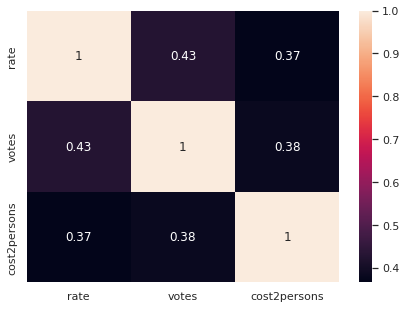

In [37]:
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(data.corr(),annot = True) 
plt.show()

> Not a very good correlation between votes, cost2persons and rate.

**Top  10 restaurant chains in Bangaluru by number of restaurants?**

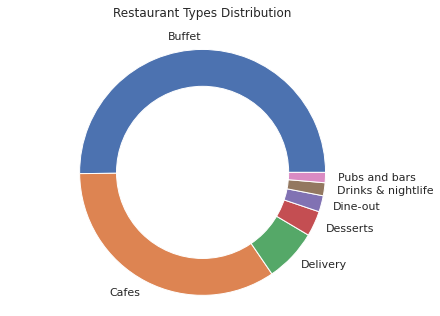

In [38]:
restaurant_counts = data['type'].value_counts()
labels = data['type'].unique()
sizes = restaurant_counts.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='', wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular
plt.title('Restaurant Types Distribution', pad=20)
plt.show()

> Buffet and Cafes restaurants type ar the most famous in the city.

In [39]:
type_counts = data['type'].value_counts()

fig = px.pie(values=type_counts.values, names=type_counts.index, title='Restaurant Types')
fig.show()

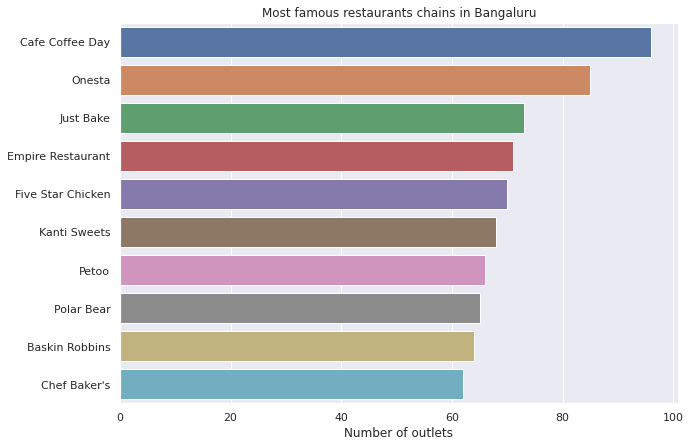

In [40]:
plt.figure(figsize=(10,7))
chains=data['name'].value_counts()[0:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 
plt.show()

In [41]:
df[(df['rate'] > 4) & (df['cost2persons'] < 1000) & (df['votes'] > df['votes'].mean())]

,,rate,votes,cost2persons
location,online_order,,,
Church Street,Yes,4.009050,1184.553936,805.102041
Cunningham Road,Yes,4.018891,850.334365,882.817337
St. Marks Road,Yes,4.116766,654.311377,890.419162


> These 3 locations are best for 2 persons under a budget of Rs. 1000.

**Which are the best restaurants for a customer?**

**By best, I mean whose rating are more than 4, cost2persons are less than 50% of the restaurants and votes are greater than average value of all the votes.**

In [42]:
med_cost  = data.cost2persons.median()
med_cost

400.0

In [43]:
avg_votes = data['votes'].mean()
avg_votes

283.69752692538236

In [44]:
data[(data['rate'] >= 4) & (data['cost2persons'] < med_cost) & (data['votes'] > avg_votes)]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2persons,type
71,The Biryani Cafe,No,No,4.1,520,Banashankari,Quick Bites,"Biryani, Chinese, Kebab",300.0,Delivery
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,Basavanagudi,Quick Bites,South Indian,150.0,Delivery
188,Kedia's Fun Food,Yes,No,4.3,630,Jayanagar,Quick Bites,"North Indian, Street Food, Juices",200.0,Delivery
191,Mini Punjabi Dhaba,Yes,No,4.2,287,Banashankari,Quick Bites,North Indian,350.0,Delivery
208,Mystique Palate,Yes,No,4.1,337,Jayanagar,Quick Bites,"Chinese, Fast Food",300.0,Delivery
...,...,...,...,...,...,...,...,...,...,...
49728,Natural Ice Cream,No,No,4.3,393,Sarjapur Road,Dessert Parlor,"Ice Cream, Beverages",200.0,Dine-out
49878,Phulke Ghar Ke,Yes,No,4.0,545,Bellandur,Quick Bites,"North Indian, Chinese",300.0,Dine-out
50153,Chatpatlal Sweets & Snacks,Yes,No,4.1,342,Marathahalli,others,"Street Food, Mithai, North Indian, Beverages, ...",200.0,Delivery
50324,Chai Galli,Yes,No,4.1,826,Brookefield,Cafe,"Cafe, Street Food",300.0,Delivery


In [45]:
#data['cost2persons'].value_counts()
#data['cost2persons'].value_counts()[600.0]

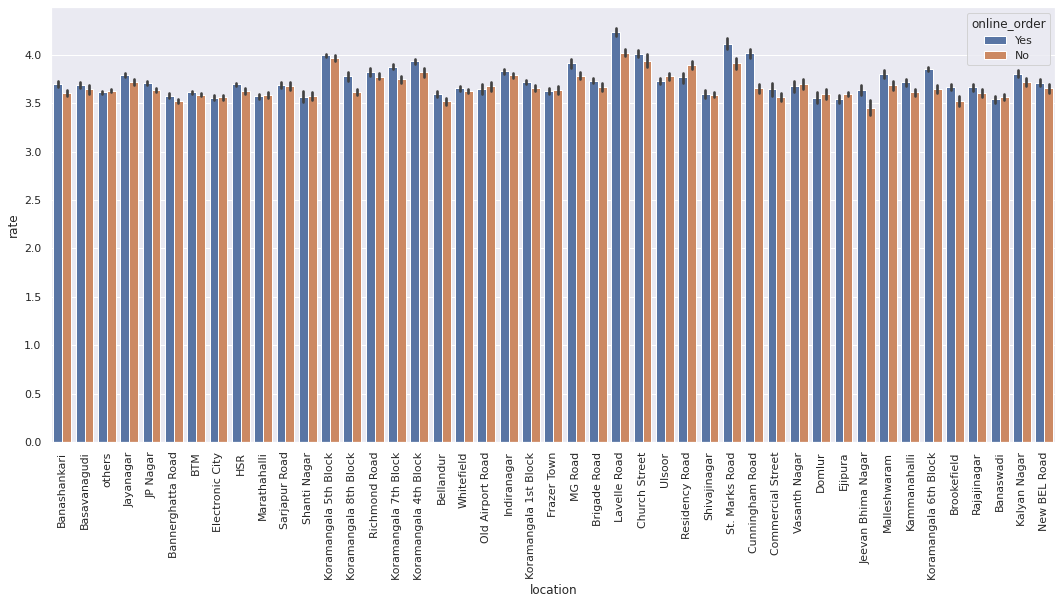

In [46]:
plt.figure(figsize=(18,8))
sns.barplot(data=data,y='rate',x='location',hue='online_order')
plt.xticks(rotation=90)
plt.show()

> locations where online service is available are getting higher rating.

In [47]:
#pivot = pd.pivot_table(df,values= None,columns=['online_order'],index = ['location'],fill_value=0,aggfunc=np.sum)
#pivot.head()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



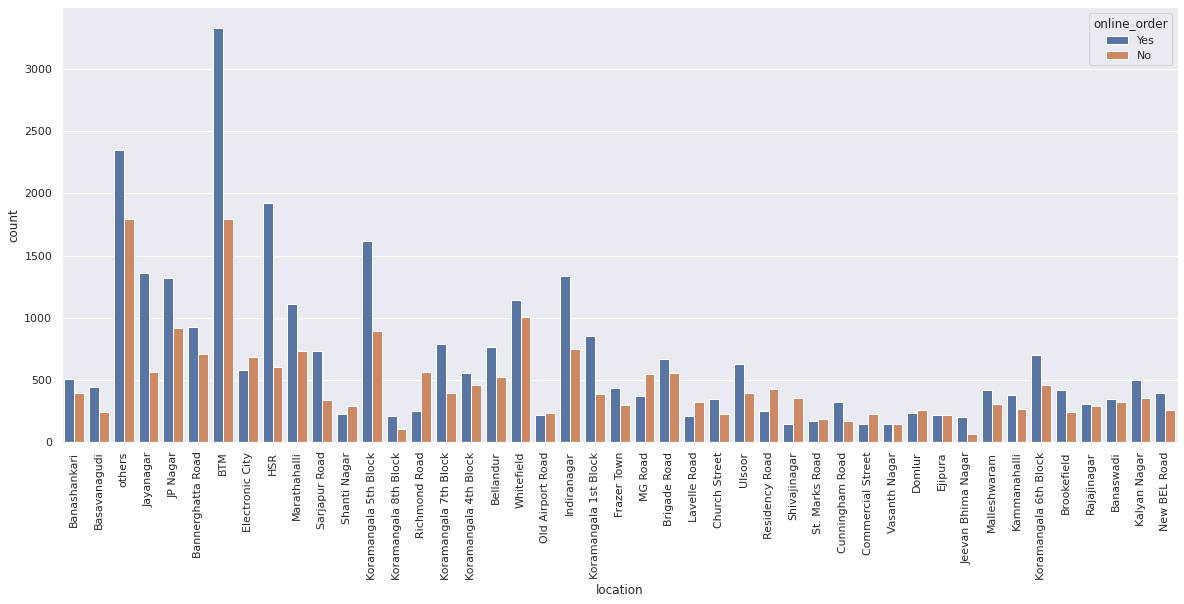

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(data['location'],data=data,hue='online_order')
plt.xticks(rotation = 90)
plt.show()

> BTM has most number of restuarants among all other locations.

In [49]:
#data[data['location']=='BTM'].count()['location']

> There are total 5098 restaurants in BTM

# Online VS Not-Online

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



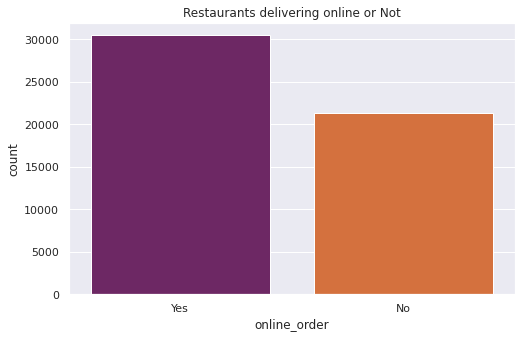

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data['online_order'], palette = 'inferno')
plt.title('Restaurants delivering online or Not')
plt.show()

# Book table providers vs Not providers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



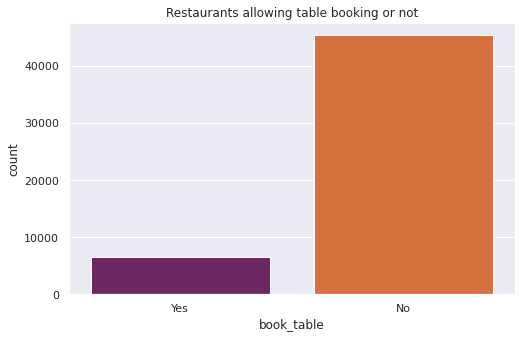

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(data['book_table'], palette = 'inferno')
plt.title('Restaurants allowing table booking or not')
plt.show()

> There are very few restaurants which are providing book table service.

# online_order VS rate

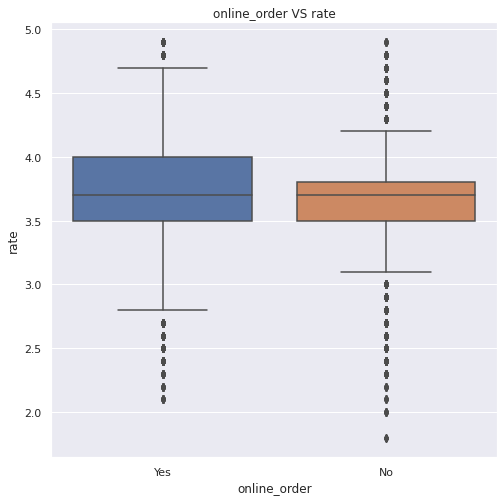

In [52]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data,x = 'online_order', y = 'rate')
plt.title('online_order VS rate')
plt.show()

> Both type of restaurants (online_order "yes" and "No") have almost same median rating.
But their min and max rating differ a lot.

# book_table VS rate

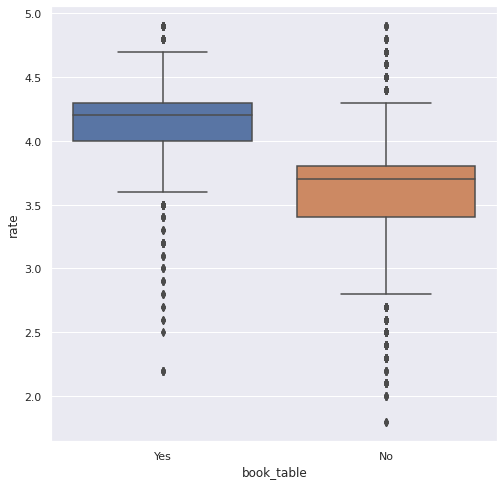

In [53]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data,x = 'book_table', y = 'rate')
plt.show()

> Restaurants with book table service are getting better rating than without book table service.

In [54]:
df2 = data.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('locataion_book_table.csv')
df2 = pd.read_csv('locataion_book_table.csv')
df2.head()

,location,book_table,name
0,BTM,No,4956
1,BTM,Yes,168
2,Banashankari,No,842
3,Banashankari,Yes,64
4,Banaswadi,No,656


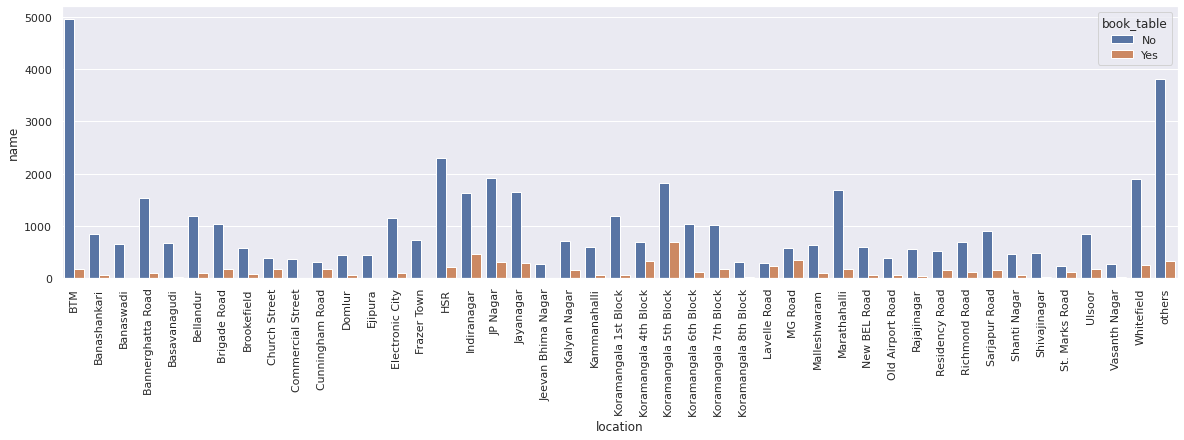

In [55]:
plt.figure(figsize=(20,5))
sns.barplot(data=df2,x='location',y='name',hue='book_table')
plt.xticks(rotation=90)
plt.show()

> There are few restaurants which are providing book_table sevice

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



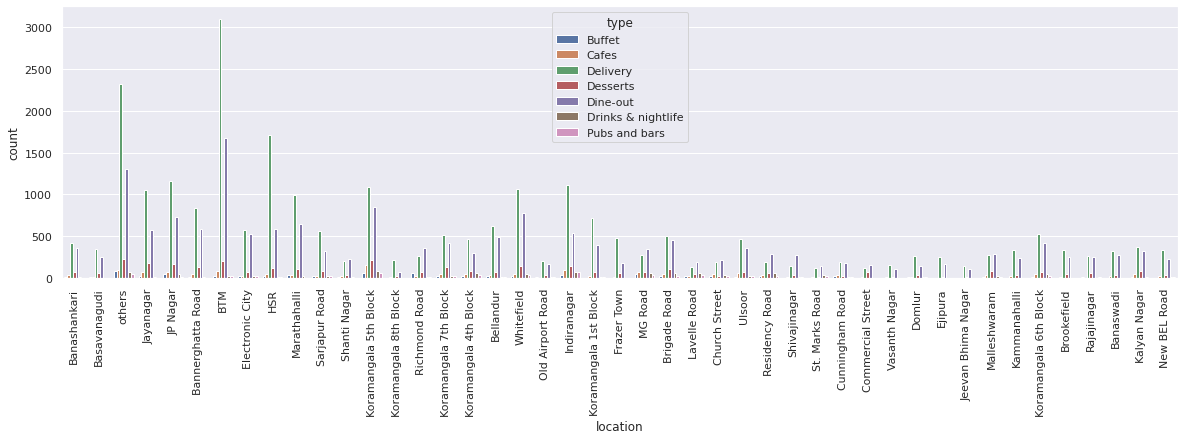

In [56]:
plt.figure(figsize=(20,5))
sns.countplot(data['location'],data=data,hue='type')
plt.xticks(rotation = 90)
plt.show()

> This will help in opening new restaurants at different locations in the city. 

# Percentage of each cuisines in Bangalore

> Buffet and cafes restaurants types are the most in Bangalore.

In [57]:
df3 = data[['cuisines', 'votes']]
df3.drop_duplicates(inplace=True)

df4 = df3.groupby(['cuisines'])['votes'].sum()
df4 = pd.DataFrame(df4)
df4 = df4.sort_values('votes', ascending=False)
df4.reset_index(inplace=True)
df4.head()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cuisines,votes
0,North Indian,243817
1,"Cafe, American, Burger, Steak",159190
2,"North Indian, Mughlai, South Indian, Chinese",154421
3,"Pizza, Cafe, Italian",140391
4,"North Indian, European, Mediterranean",94489


In [58]:
f4 = df4.sort_values('votes', ascending=False)

df_top = df4.head(10)

# Reset the index to have cuisines as a column
df_top.reset_index(inplace=True)

# Create the interactive bar chart using Plotly Express
fig = px.bar(df_top, x='cuisines', y='votes', title='Total Votes by Cuisine')

# Render the chart using the iplot function
pio.show(fig)

> North Indian is the favourite cuisine in Banglore

# Please upvote and reach me out if you need any kind of help.
# Thanks